In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('combined_data_with_embeddings.parquet')

In [3]:
df

,Text,Label,Original dataset,Row in original dataset,embedding
0,The idea of graduating high school in three ye...,Machine,essays,26613,"[0.01476596, -0.013095475, 0.002932728, -0.011..."
1,"Hey, I'm so excited to write this essay about ...",Machine,essays,26326,"[0.00292786, -0.013083563, 0.0047025573, -0.00..."
2,Introduction\n\nSelf-reliance is a concept tha...,Machine,essays,30579,"[-0.015756093, -0.023221416, -0.010959062, -0...."
3,"Sure, here's my attempt at writing an essay as...",Machine,essays,33547,"[0.013002162, 0.011017485, -0.03551094, 0.0290..."
4,The legalization of marijuana is a highly deba...,Machine,essays,33768,"[0.0016188276, 0.011155421, -0.004596148, 0.00..."
...,...,...,...,...,...
79995,The 1934 WANFL season was the 50th season of t...,Machine,wiki,116735,"[-0.02375175, 0.0018231793, -0.023106767, 0.02..."
79996,The Salle du Bel-Air or Salle du Bel-Air is a ...,Machine,wiki,101963,"[-0.028311426, -0.008757826, -0.0125656165, 0...."
79997,Jasmine Ser Xiang Wei (born 24 September 1987)...,Machine,wiki,92244,"[-0.0002513304, 0.004520807, -0.0046105087, -0..."
79998,The Nantuo 181 class tug is a Chinese diesel-e...,Machine,wiki,84183,"[-0.017250419, -0.012810612, -0.02905077, -0.0..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Text                     80000 non-null  object
 1   Label                    80000 non-null  object
 2   Original dataset         80000 non-null  object
 3   Row in original dataset  80000 non-null  int64 
 4   embedding                80000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


In [5]:
df.loc[0:3,'embedding']

0    [0.01476596, -0.013095475, 0.002932728, -0.011...
1    [0.00292786, -0.013083563, 0.0047025573, -0.00...
2    [-0.015756093, -0.023221416, -0.010959062, -0....
3    [0.013002162, 0.011017485, -0.03551094, 0.0290...
Name: embedding, dtype: object

In [6]:
print(df.loc[0, 'embedding'])

[ 0.01476596 -0.01309547  0.00293273 ... -0.00282018  0.02586309
 -0.00610633]


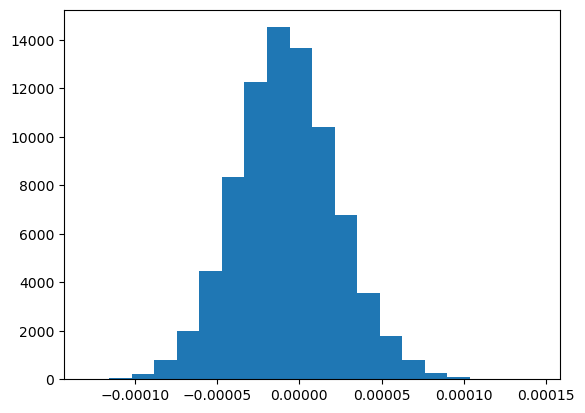

In [7]:
plt.hist(df['embedding'].apply(lambda x: x.mean()), bins = 20)
plt.show()

In [8]:
human = df[df['Label'] == 'Human']
machine = df[df['Label'] == 'Machine']

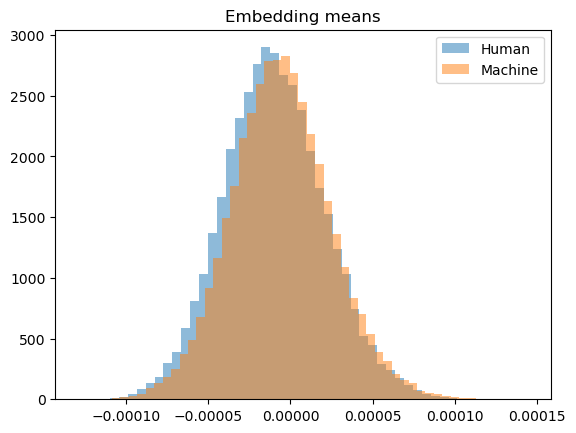

In [34]:
plt.hist(human['embedding'].apply(lambda x: x.mean()), bins = 50, alpha = 0.5, label = 'Human')
plt.hist(machine['embedding'].apply(lambda x: x.mean()), bins = 50, alpha = 0.5, label = 'Machine')
plt.legend()
plt.title("Embedding means")
plt.show()

In [12]:
# Check lengths of vectors, they're all 1
df['length'] = df['embedding'].apply(lambda x: (x**2).sum())
df['length'].value_counts()

length
1.0    42892
1.0    13097
1.0    11165
1.0    10981
1.0      947
1.0      819
1.0       99
Name: count, dtype: int64

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components = 2)

In [15]:
pca_2dim = pca.fit_transform(np.array(list(df['embedding'])))

In [16]:
df['pca_x'] = pca_2dim[:,0]
df['pca_y'] = pca_2dim[:,1]

In [17]:
human = df[df['Label'] == 'Human']
machine = df[df['Label'] == 'Machine']

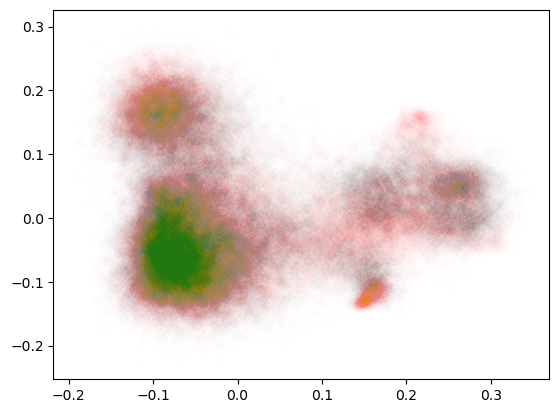

In [18]:
a = 0.005
plt.scatter(human['pca_x'], human['pca_y'], alpha = a)
plt.scatter(machine['pca_x'], machine['pca_y'], alpha = a)
plt.show()

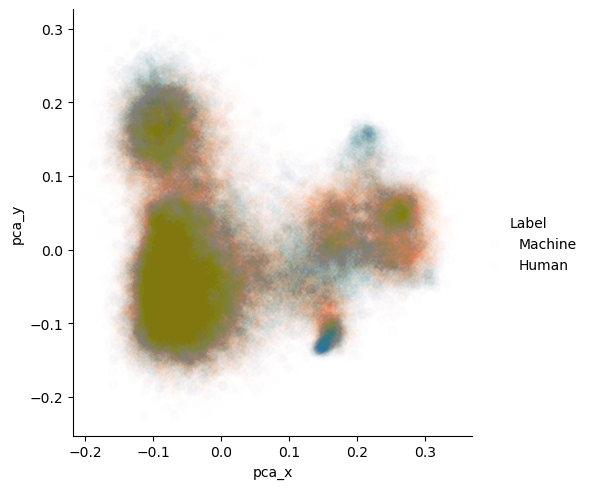

In [19]:
sns.lmplot(data = df, x = 'pca_x', y = 'pca_y', hue = 'Label', scatter_kws = {'alpha':0.008},fit_reg = False)
plt.show()

/var/folders/pz/n_v30dyj09bfnyhk_h1dnfnm0000gn/T/ipykernel_53278/1437722830.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


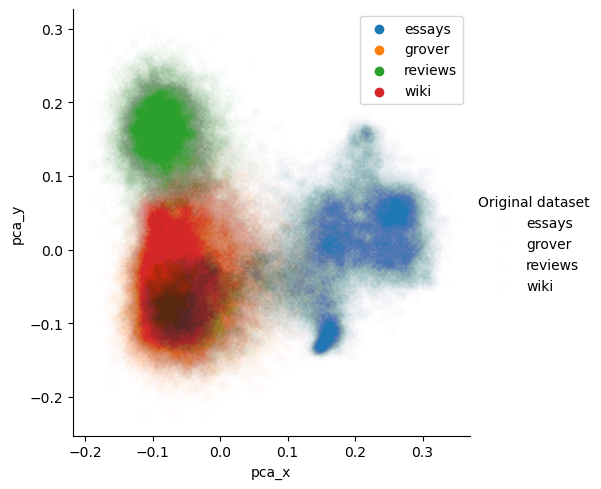

In [20]:
sns.lmplot(data = df, x = 'pca_x', y = 'pca_y', hue = 'Original dataset', scatter_kws = {'alpha':0.008},fit_reg = False)
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()